In [1]:
%matplotlib inline
from astropy.io import fits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from corner import corner
data = fits.getdata('/Users/mbaumer/Downloads/MyTable_0_mbaumer.fit')

In [6]:
data.columns

ColDefs(
    name = 'u'; format = '1E'
    name = 'g'; format = '1E'
    name = 'r'; format = '1E'
    name = 'i'; format = '1E'
    name = 'z'; format = '1E'
    name = 'ra'; format = '1D'
    name = 'dec'; format = '1D'
    name = 'flags_r'; format = '1K'; null = -9223372036854775808
    name = 'offsetRa_u'; format = '1E'
    name = 'offsetRa_g'; format = '1E'
    name = 'offsetRa_r'; format = '1E'
    name = 'offsetRa_i'; format = '1E'
    name = 'offsetRa_z'; format = '1E'
    name = 'offsetDec_u'; format = '1E'
    name = 'offsetDec_g'; format = '1E'
    name = 'offsetDec_r'; format = '1E'
    name = 'offsetDec_i'; format = '1E'
    name = 'offsetDec_z'; format = '1E'
    name = 'err_u'; format = '1E'
    name = 'err_g'; format = '1E'
    name = 'err_r'; format = '1E'
    name = 'err_i'; format = '1E'
    name = 'err_z'; format = '1E'
    name = 'extinction_u'; format = '1E'
    name = 'extinction_g'; format = '1E'
    name = 'extinction_r'; format = '1E'
    name = 'extinction_i'

## Cuts on Reasonableness

In [2]:
# no crazy magnitudes
data = data[(data['u'] < 30) & (data['u'] > 0)]
data = data[(data['g'] < 30) & (data['g'] > 0)]
data = data[(data['r'] < 30) & (data['r'] > 0)]
data = data[(data['i'] < 30) & (data['i'] > 0)]
data = data[(data['z'] < 30) & (data['z'] > 0)]

data = data[(data['err_u'] < 3)]
data = data[(data['err_g'] < 3)]
data = data[(data['err_r'] < 3)]
data = data[(data['err_i'] < 3)]
data = data[(data['err_z'] < 3)]

# no crazy offsets between bands (to deal with bad matches)
data = data[(data['offsetRa_u'] < 4) & (data['offsetRa_u'] > -4)]
data = data[(data['offsetRa_g'] < 4) & (data['offsetRa_g'] > -4)]
data = data[(data['offsetRa_r'] < 4) & (data['offsetRa_r'] > -4)]
data = data[(data['offsetRa_i'] < 4) & (data['offsetRa_i'] > -4)]
data = data[(data['offsetRa_z'] < 4) & (data['offsetRa_z'] > -4)]

data = data[(data['offsetDec_u'] < 4) & (data['offsetDec_u'] > -4)]
data = data[(data['offsetDec_g'] < 4) & (data['offsetDec_g'] > -4)]
data = data[(data['offsetDec_r'] < 4) & (data['offsetDec_r'] > -4)]
data = data[(data['offsetDec_i'] < 4) & (data['offsetDec_i'] > -4)]
data = data[(data['offsetDec_z'] < 4) & (data['offsetDec_z'] > -4)]

data = data[(~np.isnan(data['mE1_u'])) & (data['mE1_u'] < 15) & (data['mE1_u'] > -15)]
data = data[(~np.isnan(data['mE1_g'])) & (data['mE1_g'] < 15) & (data['mE1_g'] > -15)]
data = data[(~np.isnan(data['mE1_r'])) & (data['mE1_r'] < 15) & (data['mE1_r'] > -15)]
data = data[(~np.isnan(data['mE1_i'])) & (data['mE1_i'] < 15) & (data['mE1_i'] > -15)]
data = data[(~np.isnan(data['mE1_z'])) & (data['mE1_z'] < 15) & (data['mE1_z'] > -15)]

data = data[(~np.isnan(data['mE2_u'])) & (data['mE2_u'] < 15) & (data['mE2_u'] > -15)]
data = data[(~np.isnan(data['mE2_g'])) & (data['mE2_g'] < 15) & (data['mE2_g'] > -15)]
data = data[(~np.isnan(data['mE2_r'])) & (data['mE2_r'] < 15) & (data['mE2_r'] > -15)]
data = data[(~np.isnan(data['mE2_i'])) & (data['mE2_i'] < 15) & (data['mE2_i'] > -15)]
data = data[(~np.isnan(data['mE2_z'])) & (data['mE2_z'] < 15) & (data['mE2_z'] > -15)]

data = data[(data['mRrCc_u'] < 300) & (data['mRrCc_u'] > -300) & (np.abs(data['mRrCc_u']) > 1)]
data = data[(data['mRrCc_g'] < 300) & (data['mRrCc_g'] > -300) & (np.abs(data['mRrCc_g']) > 1)]
data = data[(data['mRrCc_r'] < 300) & (data['mRrCc_r'] > -300) & (np.abs(data['mRrCc_r']) > 1)]
data = data[(data['mRrCc_i'] < 300) & (data['mRrCc_i'] > -300) & (np.abs(data['mRrCc_i']) > 1)]
data = data[(data['mRrCc_z'] < 300) & (data['mRrCc_z'] > -300) & (np.abs(data['mRrCc_z']) > 1)]

data = data[(data['mE1E1Err_u'] > 0)]
data = data[(data['mE1E1Err_g'] > 0)]
data = data[(data['mE1E1Err_r'] > 0)]
data = data[(data['mE1E1Err_i'] > 0)]
data = data[(data['mE1E1Err_z'] > 0)]

#redundant if e1 err cuts pass, but w/e
data = data[(data['mE2E2Err_u'] > 0)]
data = data[(data['mE2E2Err_g'] > 0)]
data = data[(data['mE2E2Err_r'] > 0)]
data = data[(data['mE2E2Err_i'] > 0)]
data = data[(data['mE2E2Err_z'] > 0)]

#define normalized ellipticities
e1_u = data.mE1_u
e1_g = data.mE1_g
e1_r = data.mE1_r
e1_i = data.mE1_i
e1_z = data.mE1_z

e2_u = data.mE2_u
e2_g = data.mE2_g
e2_r = data.mE2_r
e2_i = data.mE2_i
e2_z = data.mE2_z

offset_u = np.sqrt(data.offsetRa_u**2+data.offsetDec_u**2)
offset_g = np.sqrt(data.offsetRa_g**2+data.offsetDec_g**2)
offset_r = np.sqrt(data.offsetRa_r**2+data.offsetDec_r**2)
offset_i = np.sqrt(data.offsetRa_i**2+data.offsetDec_i**2)
offset_z = np.sqrt(data.offsetRa_z**2+data.offsetDec_z**2)

def offset_between_bands(band1,band2):
    return np.sqrt((data['offsetRa_'+band1]-data['offsetRa_'+band2])**2
                   +(data['offsetDec_'+band1]-data['offsetDec_'+band2])**2)

In [122]:
len(data)

96594

## Magnitudes/Colors

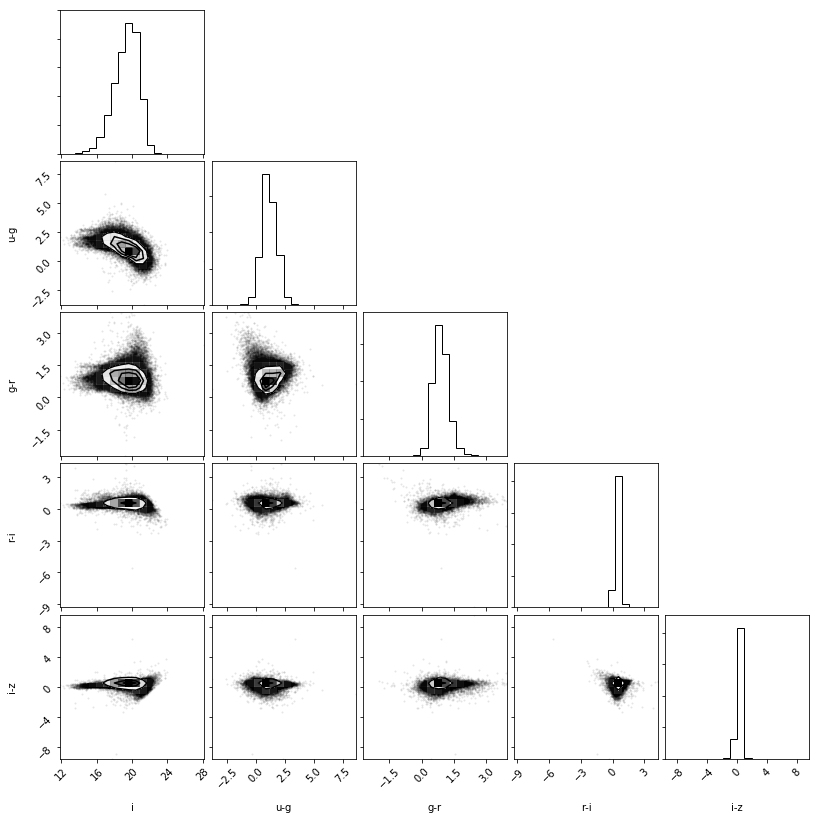

In [123]:
corner(np.array([data.i,data.u-data.g,data.g-data.r,data.r-data.i,data.i-data.z]).T,labels=['i','u-g','g-r','r-i','i-z']);

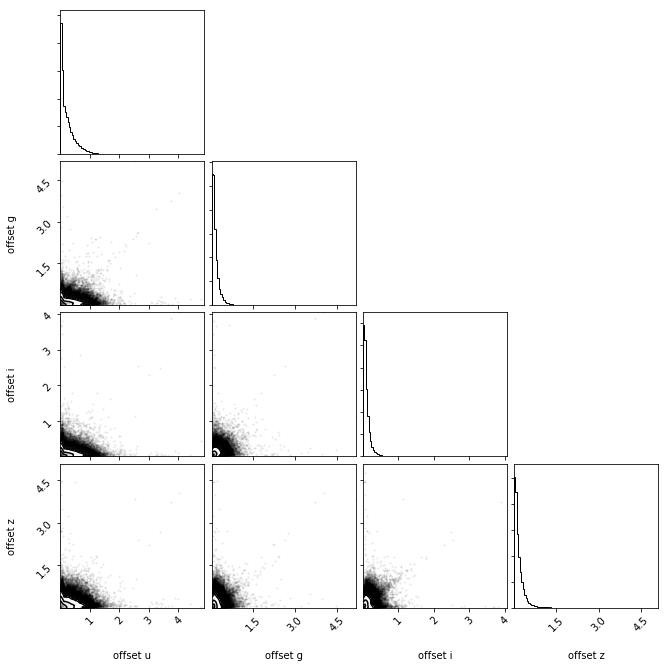

In [124]:
corner(np.array([offset_u,offset_g,offset_i,offset_z]).T,bins=100,labels=['offset u','offset g','offset i','offset z']);

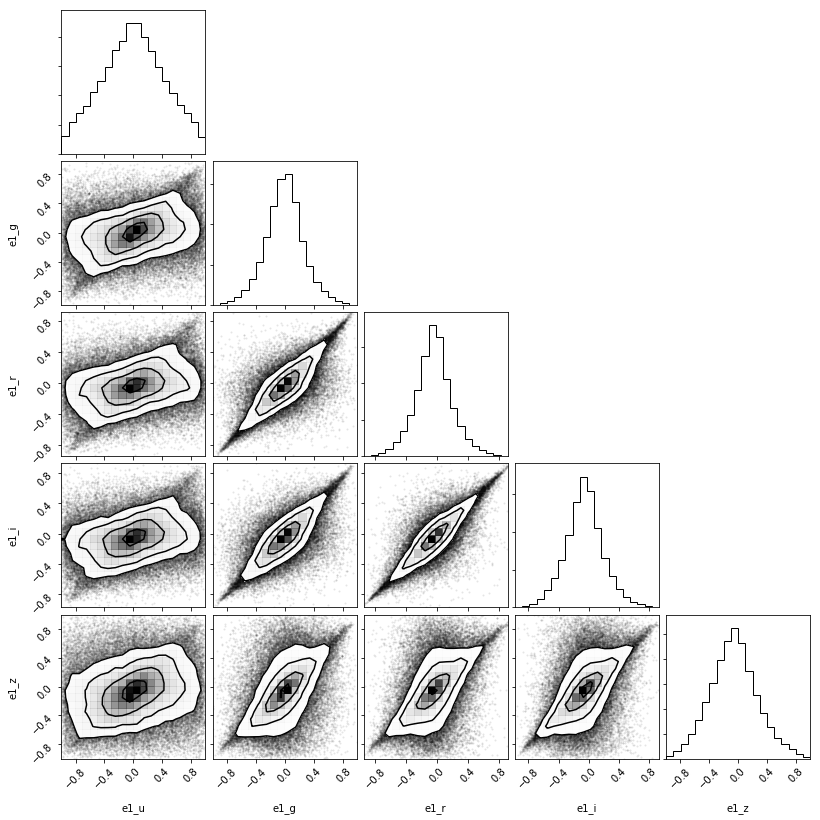

In [125]:
corner(np.array([e1_u,e1_g,e1_r,e1_i,e1_z]).T,labels=['e1_u','e1_g','e1_r','e1_i','e1_z']);

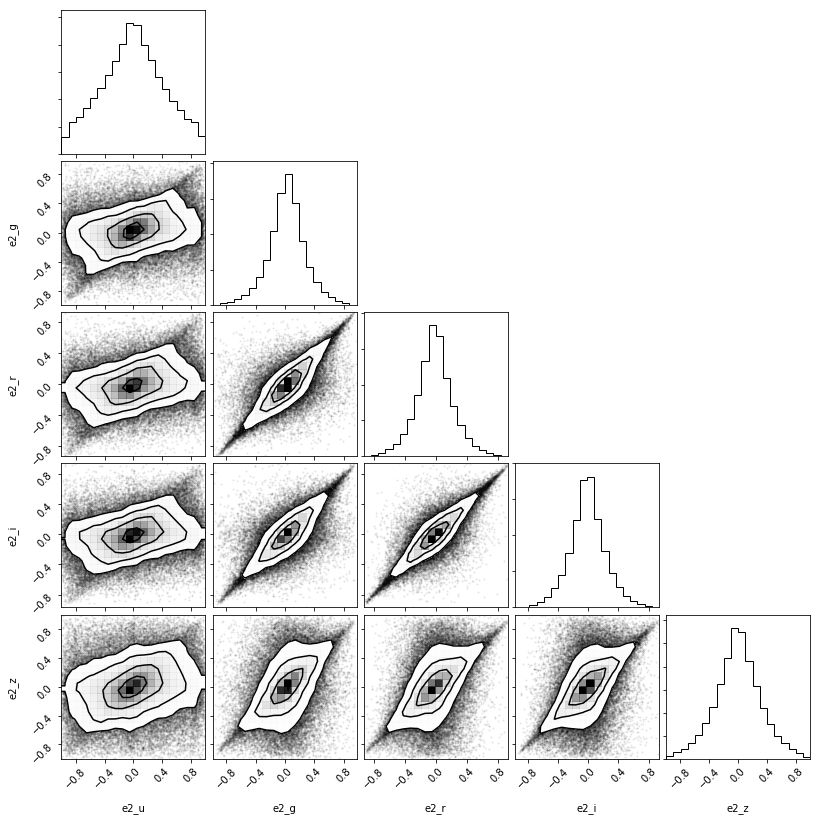

In [126]:
corner(np.array([e2_u,e2_g,e2_r,e2_i,e2_z]).T,labels=['e2_u','e2_g','e2_r','e2_i','e2_z']);

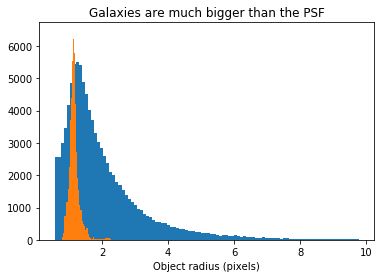

In [4]:
plt.hist(np.sqrt(data['mRrCc_u']/np.pi),bins=100);
plt.hist(np.sqrt(data['mRrCcPSF_u']/np.pi),bins=100);
plt.title('Galaxies are much bigger than the PSF')
plt.xlabel('Object radius (pixels)')

## Creating a "source-like" data table...or maybe we need the object table at this point?
Yeah, I'm going with object tables, both bc it's simpler and since we need multiband info!

In [128]:
data.columns

ColDefs(
    name = 'u'; format = '1E'
    name = 'g'; format = '1E'
    name = 'r'; format = '1E'
    name = 'i'; format = '1E'
    name = 'z'; format = '1E'
    name = 'ra'; format = '1D'
    name = 'dec'; format = '1D'
    name = 'flags_r'; format = '1K'; null = -9223372036854775808
    name = 'offsetRa_u'; format = '1E'
    name = 'offsetRa_g'; format = '1E'
    name = 'offsetRa_r'; format = '1E'
    name = 'offsetRa_i'; format = '1E'
    name = 'offsetRa_z'; format = '1E'
    name = 'offsetDec_u'; format = '1E'
    name = 'offsetDec_g'; format = '1E'
    name = 'offsetDec_r'; format = '1E'
    name = 'offsetDec_i'; format = '1E'
    name = 'offsetDec_z'; format = '1E'
    name = 'err_u'; format = '1E'
    name = 'err_g'; format = '1E'
    name = 'err_r'; format = '1E'
    name = 'err_i'; format = '1E'
    name = 'err_z'; format = '1E'
    name = 'extinction_u'; format = '1E'
    name = 'extinction_g'; format = '1E'
    name = 'extinction_r'; format = '1E'
    name = 'extinction_i'

In [133]:
len(data)

96594

In [137]:
fits.writeto('sdss_for_jenny.fits',data)

In [138]:
#test
data2 = fits.getdata('sdss_for_jenny.fits')